In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, precision_score
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [33]:
df = pd.read_csv("updated_train.csv")
df.drop(['ID'], inplace=True, axis=1)
df.head()

#df.tail()

,text,target
5282,The spread of the novel among asylum seekers o...,1
5283,Hundreds of Jewish patients are being treated...,1
5284,Beats me Honestly most of the people I follow ...,0
5285,Help us reach more people by donating and shar...,0
5286,Interest Rate Swap Derivative Pricing in Pytho...,0


<AxesSubplot:xlabel='count', ylabel='target'>

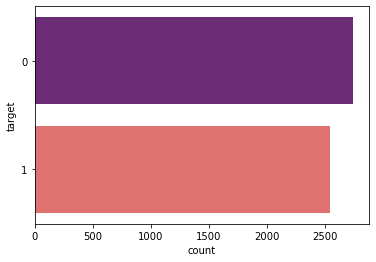

In [19]:
sns.countplot(data=df, y='target', palette='magma')

In [20]:
x = df['text']
y = df['target']

In [21]:
x_train, xtest, y_train, ytest = train_test_split(x, y, test_size=0.15, random_state=0)
xtrain, xval, ytrain, yval = train_test_split(x_train, y_train, test_size=0.50, random_state=0)

xtest.shape, ytest.shape, xtrain.shape, ytrain.shape, yval.shape, xval.shape

((794,), (794,), (2246,), (2246,), (2247,), (2247,))

<AxesSubplot:>

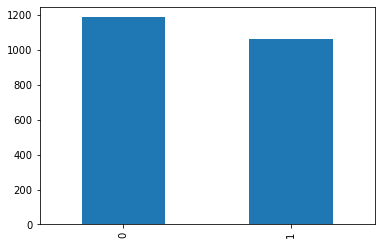

In [22]:
ytrain.value_counts().plot.bar()

In [23]:
pipe = Pipeline([('tfid', TfidfVectorizer()), ('nb', MultinomialNB())])
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('nb', MultinomialNB())])

In [24]:
ypred_initial = pipe.predict(xtrain)

In [25]:
print(classification_report(ytrain, ypred_initial))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1186
           1       0.99      0.94      0.96      1060

    accuracy                           0.96      2246
   macro avg       0.97      0.96      0.96      2246
weighted avg       0.97      0.96      0.96      2246



In [26]:
# HYPER PARAMETER TUNING

In [27]:
param_grid = {
    'tfid__ngram_range':[(1,1), (1,2), (1,3)],
    'nb__alpha':[0.1, 0.2, 1.0],
    'nb__fit_prior':[True, False]
}

In [28]:
grid = GridSearchCV(pipe, param_grid, scoring= 'precision', cv=10).fit(xval, yval)

In [29]:
grid.best_estimator_

Pipeline(steps=[('tfid', TfidfVectorizer(ngram_range=(1, 3))),
                ('nb', MultinomialNB())])

In [31]:
grid.best_score_, grid.best_params_

(0.9184359132953881,
 {'nb__alpha': 1.0, 'nb__fit_prior': True, 'tfid__ngram_range': (1, 3)})

In [32]:
x_train.shape, y_train.shape

((4493,), (4493,))

In [35]:
final_model = Pipeline([('tfid', TfidfVectorizer(ngram_range=(1,3))),
                       ('nb', MultinomialNB(alpha=1.0, fit_prior = True))])

In [36]:
final_model.fit(x_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer(ngram_range=(1, 3))),
                ('nb', MultinomialNB())])

In [37]:
test_pred = final_model.predict(xtest)

In [39]:
print(classification_report(ytrain, ypred_initial))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1186
           1       0.99      0.94      0.96      1060

    accuracy                           0.96      2246
   macro avg       0.97      0.96      0.96      2246
weighted avg       0.97      0.96      0.96      2246



In [41]:
print('Training Precision:', precision_score(ytrain, ypred_initial))
print('Validation Precision:', grid.best_score_)
print('Testing Precision:', precision_score(ytest, test_pred))

Training Precision: 0.9880597014925373
Validation Precision: 0.9184359132953881
Testing Precision: 0.932475884244373


In [46]:
test = pd.concat([xtest, ytest], axis=1)
test['Predicted'] = test_pred
test

,text,target,Predicted
29,Thx a lot for the feedback I ll stress test it...,0,0
521,rinaldi According to the new Italian governmen...,0,0
608,Artist Juan Gim nez has died due to complicati...,1,1
4094,Am I in another universe The Prime Minister ma...,1,0
4683,GBPUSD gained traction for the fourth consecut...,1,1
...,...,...,...
1087,Protecting Those on the Frontline Aiding the m...,1,1
2949,SA Will it be safe for learners to knock off a...,1,0
3714,lockdown period is a enough rehabilitation per...,1,1
543,Jurnal Ramadan by A THREAD,0,0
